In [ ]:
library(readr)
library("dplyr")
library("zipcodeR")
library(ggplot2)
library("ggpubr")

In [ ]:
data_zipcode1<- read_tsv('C:/Users/Yixuan/OneDrive - University of Pittsburgh/Desktop/Data for Social Good/SCI/zcta_zcta_shard1.tsv')

In [ ]:
PA<-search_state('PA')

In [ ]:
distance_zip1<-zip_distance(data_zipcode1$user_loc,data_zipcode1$fr_loc)
distance_zip1 <- distance_zip1[!is.na(distance_zip1$distance), ]
distance_zip1 <- setNames(distance_zip1, c("user_loc","fr_loc","distance"))
total_1 <- merge(data_zipcode1,distance_zip1,by=c("user_loc","fr_loc"))
PA_user <- setNames(PA, c("user_loc"))
total_1 <- merge(total_1,PA_user,by=c("user_loc"))
PA_fr <- setNames(PA, c("fr_loc"))
total_1 <- merge(total_1,PA_fr,by=c("fr_loc"))

In [ ]:
PA<-PA[ , c('zipcode')]
PA_user <- setNames(PA, c("user_loc"))
total <- merge(total_1,PA_user,by=c("user_loc"))

PA_fr <- setNames(PA, c("fr_loc"))
total <- merge(total_1,PA_fr,by=c("fr_loc"))

total<-subset(total, scaled_sci!=1)

In [ ]:
max_value=max(total$scaled_sci)
total$scaled_sci<-total$scaled_sci/max_value

write.csv(total,"C:/Users/Yixuan/OneDrive - University of Pittsburgh/Desktop/Data for Social Good/SCI/dataset_sci_dis_pa.csv", row.names = FALSE)

In [ ]:
total<- read_csv('total.csv')

In [ ]:
distance_plot<-ggplot(total, aes(x = distance, y =scaled_sci )) +
  geom_point()+scale_y_log10()
distance_plot

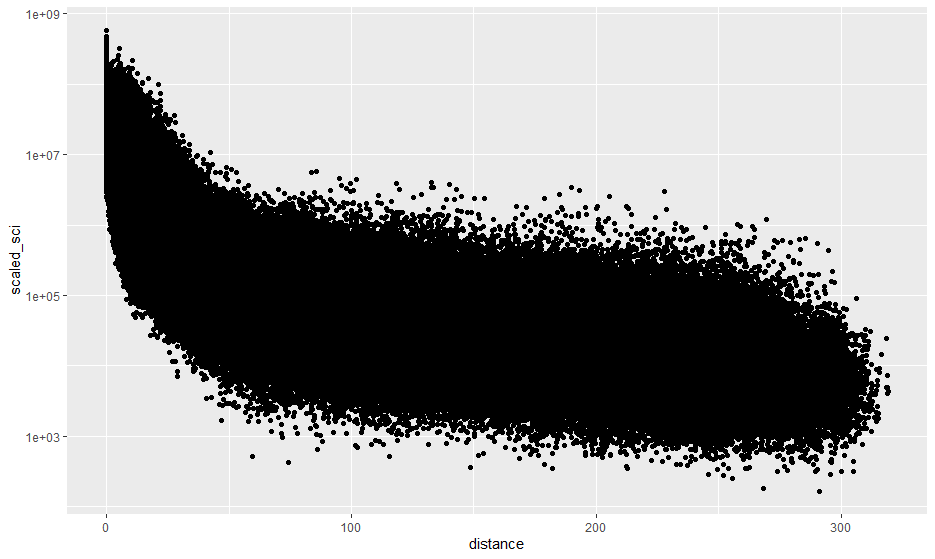

In [ ]:
geom_smooth(formula = 'total$scaled_sci ~ total$distance', method = "lm")
ggscatter(total, x ="distance", y ="scaled_sci",
          color = "black", shape = 21, size = 2,
          add = "reg.line", conf.int = TRUE,
          cor.coef = TRUE, cor.method = "pearson", 
          xlab = "distance", ylab = "scaled_sci")+scale_y_log10()

In [ ]:
reg <- lm(scaled_sci ~ distance, data = total)

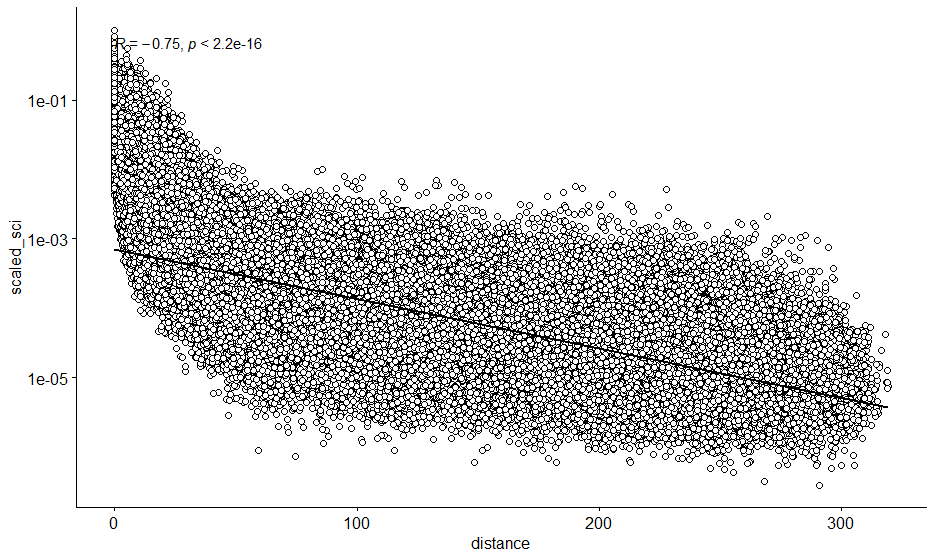

In [ ]:
max_value=max(total$scaled_sci)
total$scaled_sci<-total$scaled_sci/max_value
mean_distance=mean(total$distance)
total$distance<-total$distance/mean_distance
distance_plot<-ggplot(total, aes(x = distance, y =scaled_sci )) +
  geom_point()+scale_y_log10()
distance_plot

geom_smooth(formula = 'total$scaled_sci ~ total$distance', method = "lm")
ggscatter(total, x ="distance", y ="scaled_sci",
          color = "black", shape = 21, size = 2,
          add = "reg.line", conf.int = TRUE,
          cor.coef = TRUE, cor.method = "pearson", 
          xlab = "distance", ylab = "scaled_sci")+scale_y_log10()

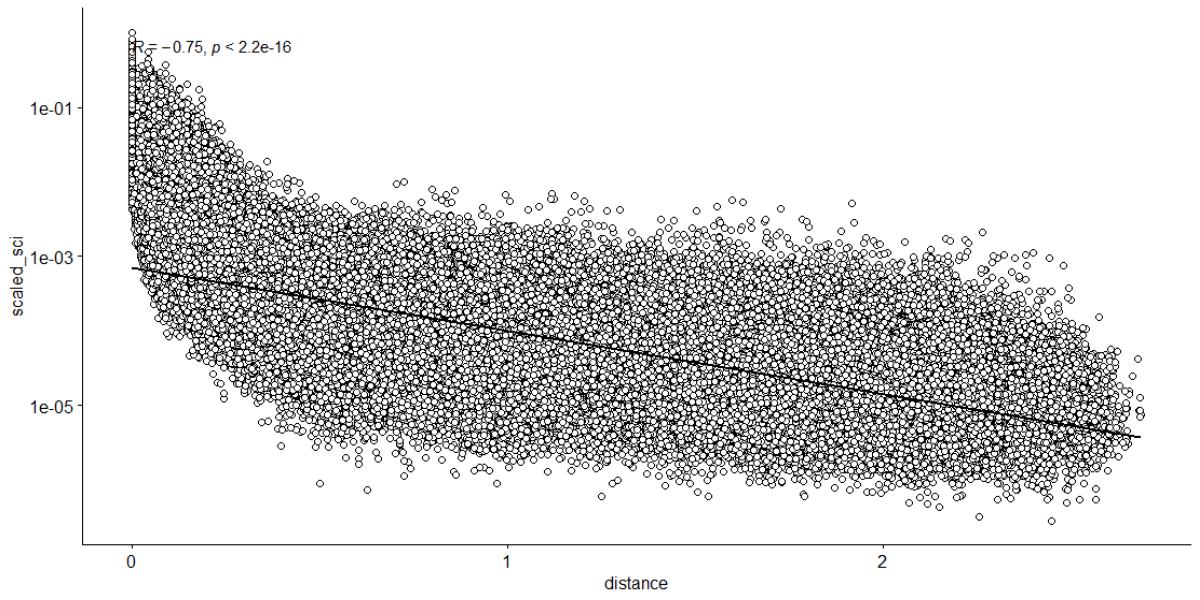

In [ ]:
summary(reg)

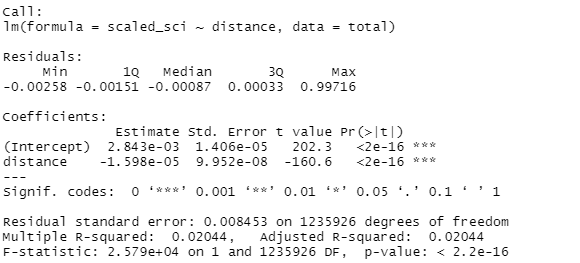